In [23]:
import pandas as pd
import numpy as np
from photutils import DAOStarFinder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/home/jovyan/work')
import init
import reading
import do_calibration

import importlib
importlib.reload(do_calibration)

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import init

#### Create charts showing statistics on the detected stars, variables, ...

def plot_cumul_histo_detections(savefig=True):
    result = read_lightcurves()
    keys = result.keys()
    values = list(map(lambda x: x[0]/x[1]*100, result.values()))
    print(len(keys), len(values))
    print('converted values')
    colors = list("rgbcmyk")
    sigma = 15
    num_bins = 50
    mu = 100  # mean of distribution

    fig, ax = plt.subplots()

    # the histogram of the data
    n, bins, patches = ax.hist(values, num_bins, density=1)

    # add a 'best fit' line
    #y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
    #     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    #ax.plot(bins, range(1,50), '--')
    ax.set_xlabel('% of star detections, on which star was found')
    ax.set_ylabel('Nr of stars')
    ax.set_title(r'Cumulative histogram of star detections')
    ax.grid(True)
    #plt.xticks(np.arange(0, 110, step=10))
    major_ticks = np.arange(0, 11000, 2000)
    minor_ticks = np.arange(0, 11000, 1000)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    plt.minorticks_on()
    plt.xlim(0,100)
    plt.ylim(0,10000)
    #plt.yticks(np.arange(0, 11000, step=1000))
    # Tweak spacing to prevent clipping of ylabel
    #fig.tight_layout()
    plt.hist(bins=10, x=values, cumulative=1)
    plt.show()
    if savefig:
        save(fig, init.fieldchartsdirs + 'cumul_histo_detections.png')

    fig, ax = plt.subplots()
    ax.set_xlabel('star number')
    ax.set_ylabel('Star is in % of images')
    ax.set_title(r'Barchart of on which % of images the star is seen')
    ax.grid(True)
    xaxis = range(0, len(values))
    print(len(xaxis), len(values))
    plt.bar(x=xaxis, height=sorted(values), width=1)
    plt.show()
    save(fig, init.fieldchartsdirs + 'barcharts.png')


def read_lightcurves():
    files = glob.glob(init.lightcurvedir+'*.txt')
    result = {}
    for file in files:
        df = pd.read_csv(file, skiprows=[1], sep=' ')
        length = len(df.index)
        df = df[df['V-C'] < 99]
        filterlength = len(df.index)
        #print (filterlength/length)
        result[file] = [filterlength, length]
    #df.head()
    #print(result)
    return result

def save(fig, path):
    fig.savefig(path)
    plt.close(fig)


9999 9999
converted values


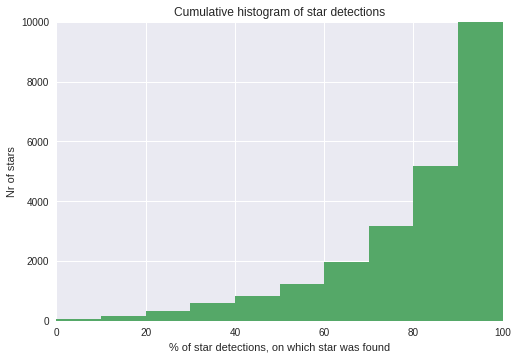

9999 9999


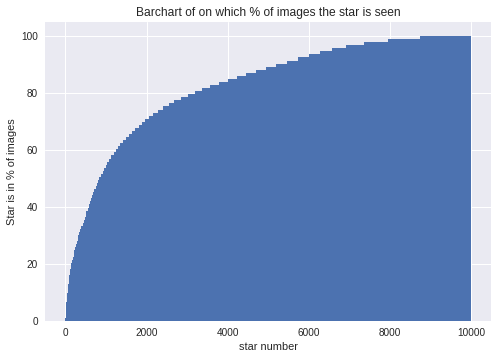

In [27]:
plot_cumul_histo_detections(True)